# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [46]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv("../data/am_pm.csv")
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


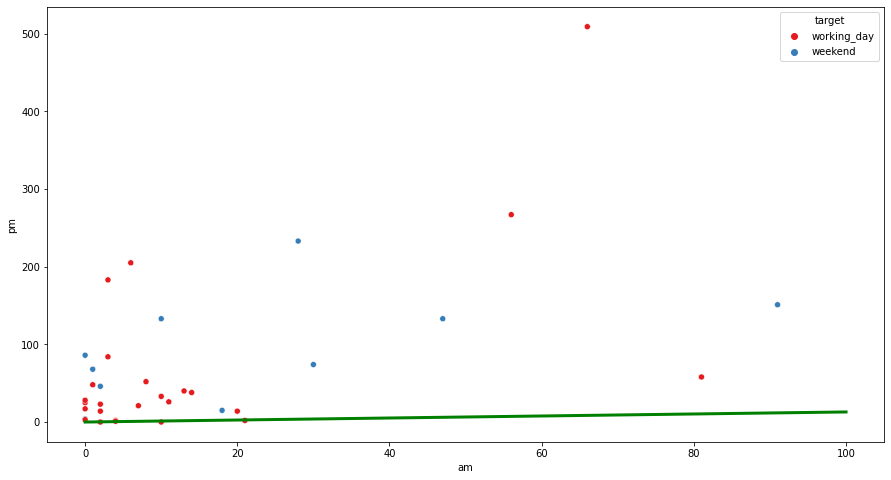

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df, x="am", y="pm", hue="target", ax=ax, palette='Set1')
coef = [-0.00038653,  0.00298066] #  посчитано с помощью атрибута coef_ у результата возврата логистической регрессии
os_x = np.linspace(0,100,500)
preds = (-coef[0]*os_x)/coef[1]
l = plt.plot(os_x, preds, color = 'green', lw = 3)

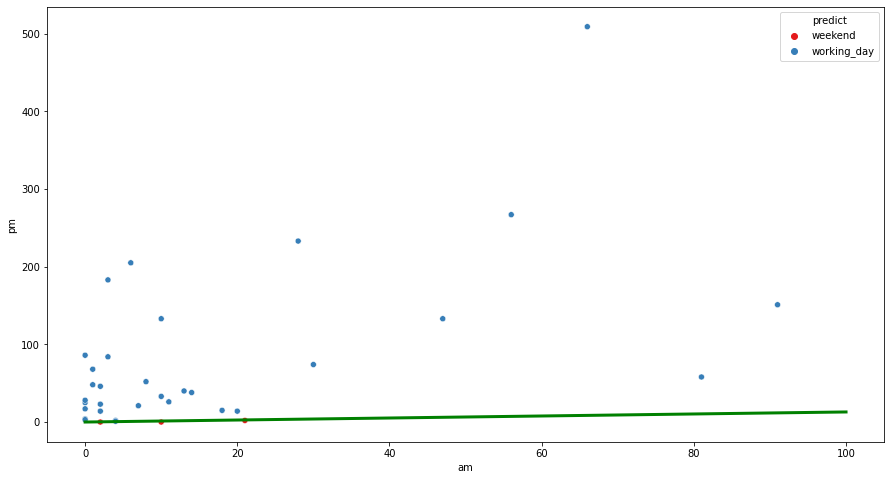

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df, x="am", y="pm", hue="predict", ax=ax, palette='Set1')
preds = (-coef[0]*os_x)/coef[1]
ll = plt.plot(os_x, preds, color = 'green', lw = 3)

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [5]:
X = StandardScaler().fit_transform(df[['am','pm']])

In [6]:
y = df['target']
log_reg = LogisticRegression(fit_intercept=False, random_state=21).fit(X, y)
df['predict'] = log_reg.predict(X)
df.head(5)

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,working_day
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [7]:
accuracy_score(y, df.predict)

0.7428571428571429

точность на нормализованной модели на порядок лучше, чем на ненормализованной. то есть стало лучше - да

In [8]:
data = pd.DataFrame(X, columns=['am', 'pm'])
data['target'] = df['target']
data['predict'] = df['predict']

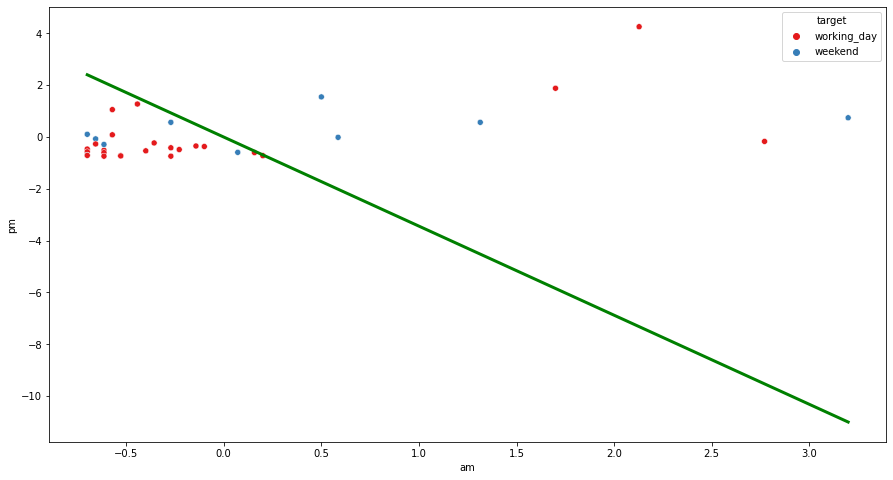

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax, palette='Set1')
coef = log_reg.coef_.T
os_x = np.linspace(min(data['am']), max(data['am']))
preds = (-coef[0]*os_x) / coef[1]
l = plt.plot(os_x, preds, color = 'green', lw = 3)

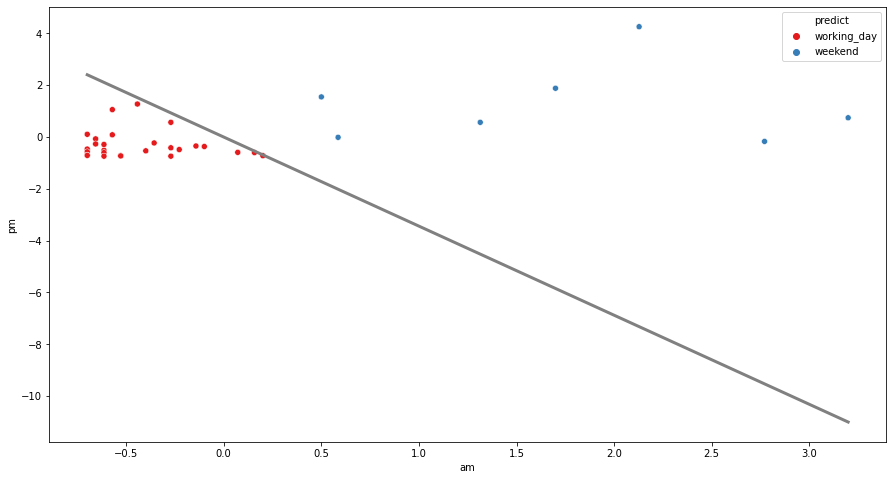

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax, palette='Set1')
l = plt.plot(os_x, preds, color = 'grey', lw = 3)

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [11]:
X = data[['am','pm']]
my_svm = svm.SVC(random_state = 21, probability=True)
my_svm.fit(X, y)

SVC(probability=True, random_state=21)

In [12]:
data['predict'] = my_svm.predict(X)

In [13]:
accuracy_score(y, data['predict'])

0.7428571428571429

In [16]:
my_kernel_svm = svm.SVC(random_state = 21, probability=True, kernel ='linear')
my_kernel_svm.fit(X, y)
accuracy_score(y, my_kernel_svm.predict(X))

0.7142857142857143

In [17]:
my_sig_svm = svm.SVC(random_state = 21, probability=True, kernel ='sigmoid')
my_sig_svm.fit(X, y)
accuracy_score(y, my_sig_svm.predict(X))

0.6857142857142857

In [18]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    Z = [[1 if i == 'working_day' else 0 for i in line] for line in list(Z)]
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [19]:
X0, X1 = data['am'], data['pm']
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


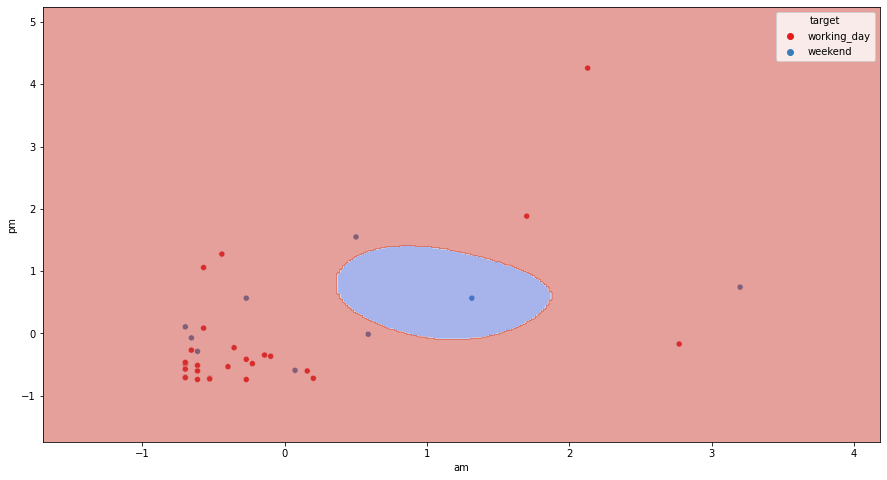

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax, palette='Set1')
ll = plot_contours(ax, my_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


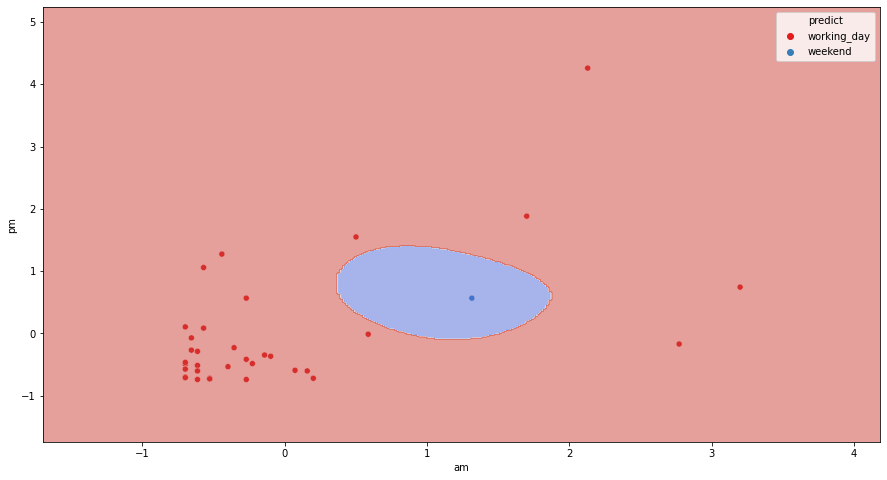

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax, palette='Set1')
ll = plot_contours(ax, my_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [32]:
dtc_model_main = DecisionTreeClassifier(max_depth = 4, random_state = 42)
dtc_model_main.fit(X, y)
data['predict'] = dtc_model_main.predict(X)

In [33]:
accuracy_score(y, data['predict'])

0.9428571428571428

In [35]:
dtc_model = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dtc_model.fit(data[['am', 'pm']], y)
accuracy_score(y, dtc_model.predict(data[['am', 'pm']]))

0.7714285714285715

In [39]:
dtc_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dtc_model.fit(data[['am', 'pm']], y)
accuracy_score(y, dtc_model.predict(data[['am', 'pm']]))

0.9714285714285714

In [41]:
dtc_model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
dtc_model.fit(data[['am', 'pm']], y)
accuracy_score(y, dtc_model.predict(data[['am', 'pm']]))

1.0

In [42]:
dtc_model = DecisionTreeClassifier(max_depth = 7, random_state = 42)
dtc_model.fit(data[['am', 'pm']], y)
accuracy_score(y, dtc_model.predict(data[['am', 'pm']]))

1.0

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


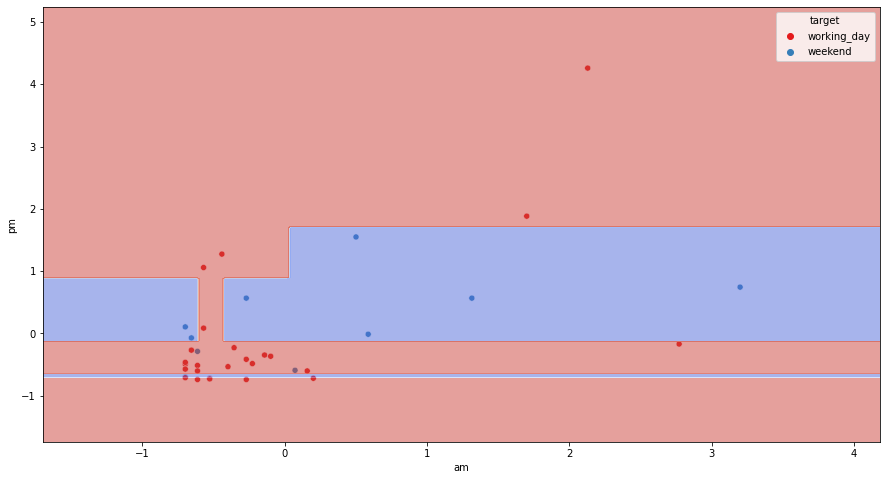

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="target", ax=ax, palette='Set1')
plot_contours(ax, dtc_model_main, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


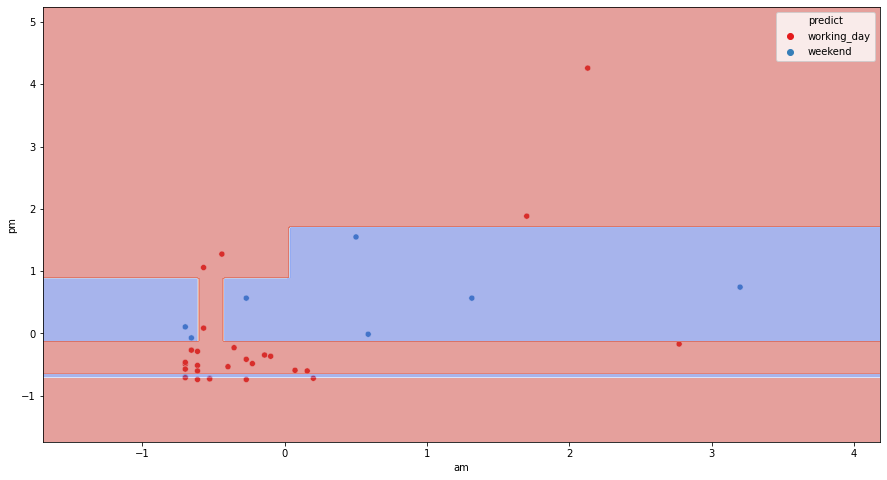

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x="am", y="pm", hue="predict", ax=ax, palette='Set1')
plot_contours(ax, dtc_model_main, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

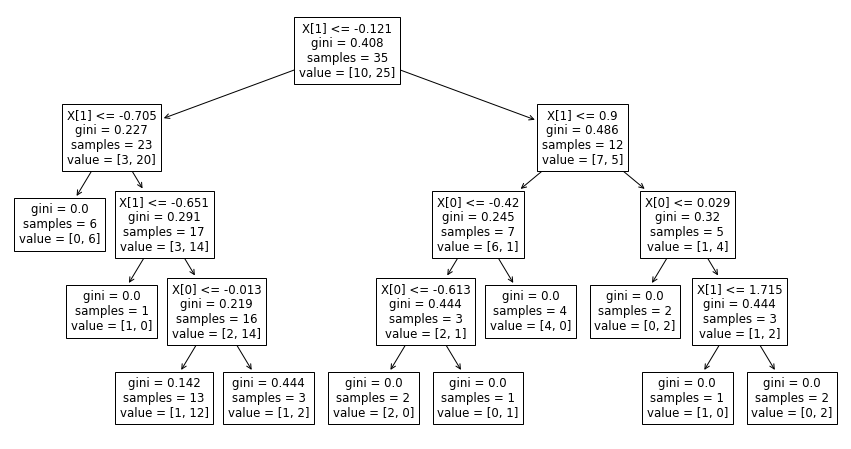

In [47]:
plt.subplots(figsize=(15,8))
plot_tree(dtc_model_1)
plt.show()

судя по данному дереву решений, количество листьев, которые листьев, которые считают дни рабочими - 4. 